# CS513 winery data profiling

## 1. Set up SQL in notebook

Prerequisite commands to run:

```pip3 install pandas```

```pip3 install ipython-sql```

```pip3 install matplotlib```

In [1]:
# Import required libraries
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Connect to SQLite database
conn = sqlite3.connect(r'cs513_final_project_profiling.db')
  
# Load CSV data into Pandas DataFrame
winery_ = pd.read_csv('raw_data/winemag-data-130k-v2.csv')

# Write the data to a sqlite table
winery_.to_sql('winery', conn, if_exists='replace', index=False)

129971

In [3]:
# Set up ipython-sql
%load_ext sql
# %reload_ext sql
winery_db_url = 'sqlite:///' + os.path.expanduser('cs513_final_project_profiling.db')
%sql $winery_db_url

### 1.1 Validate database table is created and schema

In [4]:
%%sql 
SELECT sql FROM sqlite_schema WHERE name='winery';

 * sqlite:///cs513_final_project_profiling.db
Done.


sql
"CREATE TABLE ""winery"" (""Unnamed: 0"" INTEGER, ""country"" TEXT, ""description"" TEXT, ""designation"" TEXT, ""points"" INTEGER, ""price"" REAL, ""province"" TEXT, ""region_1"" TEXT, ""region_2"" TEXT, ""taster_name"" TEXT, ""taster_twitter_handle"" TEXT, ""title"" TEXT, ""variety"" TEXT, ""winery"" TEXT)"


In [5]:
%%sql 
SELECT * FROM winery LIMIT 3;

 * sqlite:///cs513_final_project_profiling.db
Done.


Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,None,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


## 2. Statistic of the data

In [6]:
# Total count of records in the winery table
total_count_sql_result = %sql SELECT COUNT(*) as total_count FROM winery;
total_count = total_count_sql_result[0].total_count

print(f'total count of records in table winery: {total_count}.')

 * sqlite:///cs513_final_project_profiling.db
Done.
total count of records in table winery: 129971.


### 2.1 Null field count and percentage

In [7]:
%%capture
country_null_count_sql_result = %sql SELECT COUNT(*) as country_null_count FROM winery WHERE country is NULL or country='';

description_null_count_sql_result = %sql SELECT COUNT(*) as description_null_count FROM winery WHERE description is NULL or description='';

designation_null_count_sql_result = %sql SELECT COUNT(*) as designation_null_count FROM winery WHERE designation is NULL or designation='';

points_null_count_sql_result = %sql SELECT COUNT(*) as points_null_count FROM winery WHERE points is NULL;

price_null_count_sql_result = %sql SELECT COUNT(*) as price_null_count FROM winery WHERE price is NULL;

province_null_count_sql_result = %sql SELECT COUNT(*) as province_null_count FROM winery WHERE province is NULL or province='';

region_1_null_count_sql_result = %sql SELECT COUNT(*) as region_1_null_count FROM winery WHERE region_1 is NULL or region_1='';

region_2_null_count_sql_result = %sql SELECT COUNT(*) as region_2_null_count FROM winery WHERE region_2 is NULL or region_2='';

taster_name_null_count_sql_result = %sql SELECT COUNT(*) as taster_name_null_count FROM winery WHERE taster_name is NULL or taster_name='';

taster_twitter_handle_null_count_sql_result = %sql SELECT COUNT(*) as taster_twitter_handle_null_count FROM winery WHERE taster_twitter_handle is NULL or taster_twitter_handle='';

title_null_count_sql_result = %sql SELECT COUNT(*) as title_null_count FROM winery WHERE title is NULL or title='';

variety_null_count_sql_result = %sql SELECT COUNT(*) as variety_null_count FROM winery WHERE variety is NULL or variety='';

winery_null_count_sql_result = %sql SELECT COUNT(*) as winery_null_count FROM winery WHERE winery is NULL or winery='';
;

def print_null_count(sql_result, field_name):
    null_count = sql_result[0][0]
    print(f'count of null value for {field_name} column: {null_count}, percentage: {round(null_count/total_count * 100, 3)}%')


In [8]:
# Stat of null or empty value for each field
print_null_count(country_null_count_sql_result,'country')
print_null_count(description_null_count_sql_result,'description')      
print_null_count(designation_null_count_sql_result,'designation')
print_null_count(points_null_count_sql_result,'points')
print_null_count(price_null_count_sql_result,'price')
print_null_count(province_null_count_sql_result,'province')
print_null_count(region_1_null_count_sql_result,'region_1')
print_null_count(region_2_null_count_sql_result,'region_2')
print_null_count(taster_name_null_count_sql_result,'taster_name')
print_null_count(taster_twitter_handle_null_count_sql_result,'taster_twitter_handle')
print_null_count(title_null_count_sql_result,'title')
print_null_count(variety_null_count_sql_result,'variety')
print_null_count(winery_null_count_sql_result,'winery')

count of null value for country column: 63, percentage: 0.048%
count of null value for description column: 0, percentage: 0.0%
count of null value for designation column: 37465, percentage: 28.826%
count of null value for points column: 0, percentage: 0.0%
count of null value for price column: 8996, percentage: 6.922%
count of null value for province column: 63, percentage: 0.048%
count of null value for region_1 column: 21247, percentage: 16.347%
count of null value for region_2 column: 79460, percentage: 61.137%
count of null value for taster_name column: 26244, percentage: 20.192%
count of null value for taster_twitter_handle column: 31213, percentage: 24.015%
count of null value for title column: 0, percentage: 0.0%
count of null value for variety column: 1, percentage: 0.001%
count of null value for winery column: 0, percentage: 0.0%


### 2.2 Statistic of Numeric field

### 2.2.1 Price

In [9]:
price_stat = %sql SELECT MIN(price) as price_min, MAX(price) as price_max, AVG(price) as price_avg FROM winery WHERE price is not NULL;

print(f'price minimum value: {price_stat[0][0]}, maximum value: {price_stat[0][1]}, average value: {price_stat[0][2]}')

 * sqlite:///cs513_final_project_profiling.db
Done.
price minimum value: 4.0, maximum value: 3300.0, average value: 35.363389129985535


### 2.2.2 Points

In [10]:
points_stat = %sql SELECT MIN(points) as points_min, MAX(points) as points_max, AVG(points) as points_avg FROM winery WHERE points is not NULL;

print(f'points minimum value: {points_stat[0][0]}, maximum value: {points_stat[0][1]}, average value: {points_stat[0][2]}')

 * sqlite:///cs513_final_project_profiling.db
Done.
points minimum value: 80, maximum value: 100, average value: 88.44713820775404


### 2.3 Statistic of Non-numeric field

#### 2.3.1. top 10 Country with most wine records

 * sqlite:///cs513_final_project_profiling.db
Done.


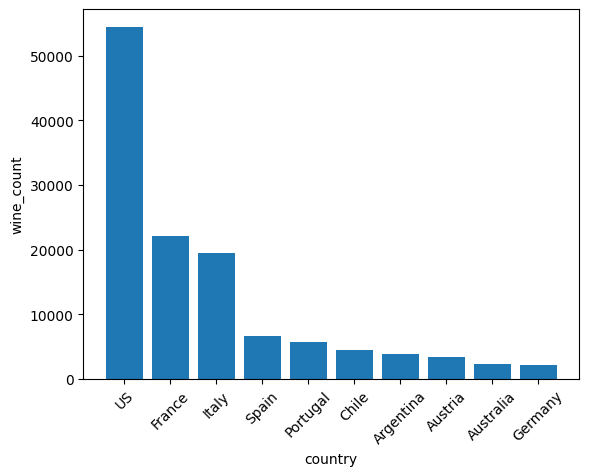

In [11]:
country_count_result = %sql SELECT country, count(*) as wine_count FROM winery WHERE country is not null GROUP BY country ORDER BY wine_count DESC LIMIT 10;
pie_plot = country_count_result.bar()

#### 2.3.2. top 10 designation with most wine records¶


 * sqlite:///cs513_final_project_profiling.db
Done.


<BarContainer object of 10 artists>

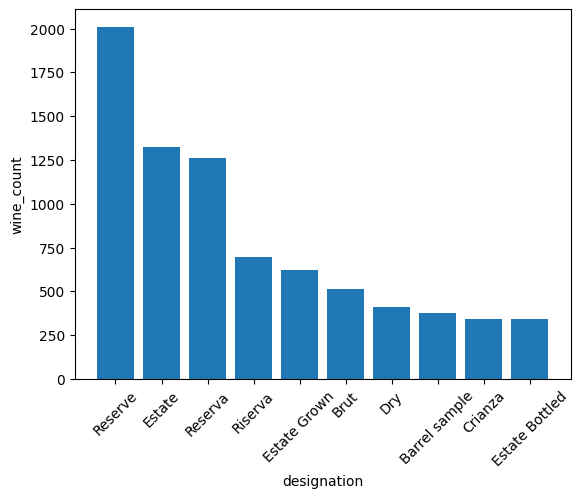

In [12]:
designation_count_result = %sql SELECT designation, count(*) as wine_count FROM winery WHERE designation is not null GROUP BY designation ORDER BY wine_count DESC LIMIT 10;
designation_count_result.bar()

#### 2.3.3. top 10 Province with most wine records

 * sqlite:///cs513_final_project_profiling.db
Done.


<BarContainer object of 10 artists>

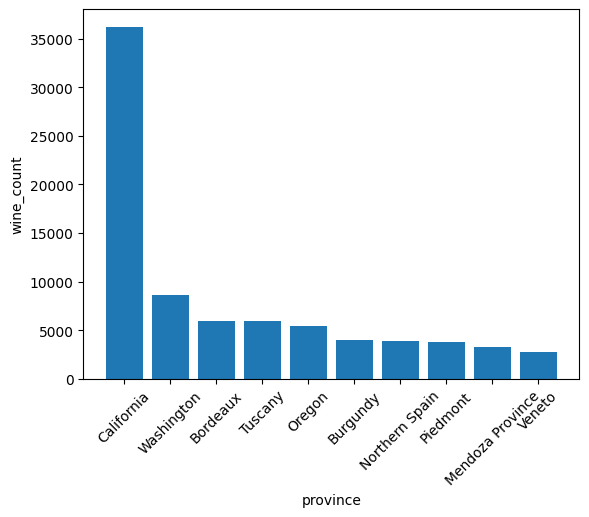

In [13]:
province_count_result = %sql SELECT province, count(*) as wine_count FROM winery WHERE province is not null GROUP BY province ORDER BY wine_count DESC LIMIT 10;
province_count_result.bar()

#### 2.3.4. top 10 region_1 with most wine records¶

 * sqlite:///cs513_final_project_profiling.db
Done.


<BarContainer object of 10 artists>

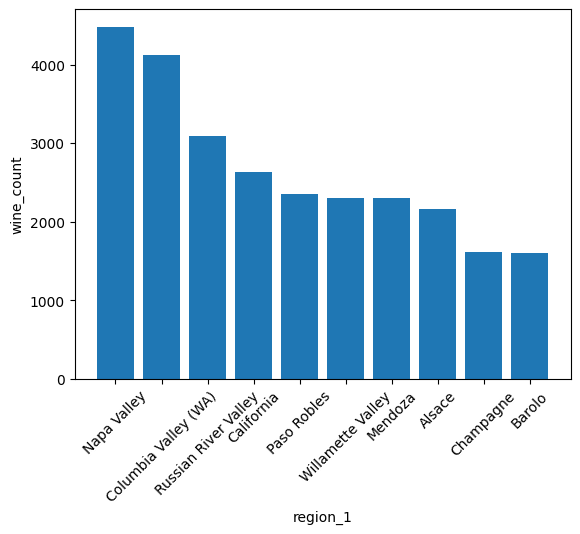

In [14]:
region_1_count_result = %sql SELECT region_1, count(*) as wine_count FROM winery WHERE region_1 is not null GROUP BY region_1 ORDER BY wine_count DESC LIMIT 10;
region_1_count_result.bar()

#### 2.3.5. top 10 region_2 with wine records

 * sqlite:///cs513_final_project_profiling.db
Done.


<BarContainer object of 10 artists>

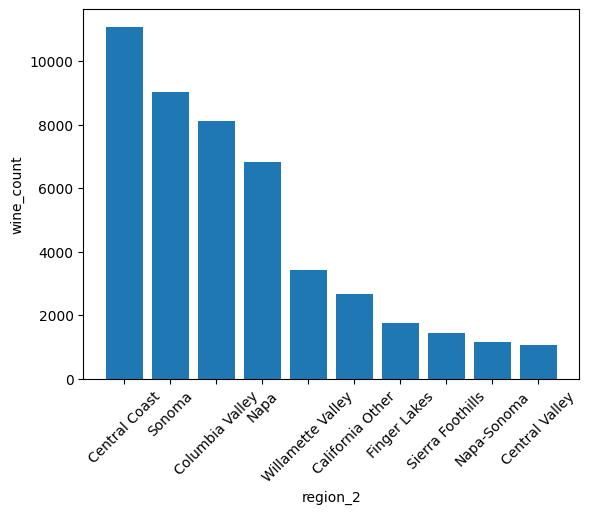

In [15]:
region_2_count_result = %sql SELECT region_2, count(*) as wine_count FROM winery WHERE region_2 is not null GROUP BY region_2 ORDER BY wine_count DESC LIMIT 10;
region_2_count_result.bar()


#### 2.3.6. top 10 variety with most wine records¶

 * sqlite:///cs513_final_project_profiling.db
Done.


<BarContainer object of 10 artists>

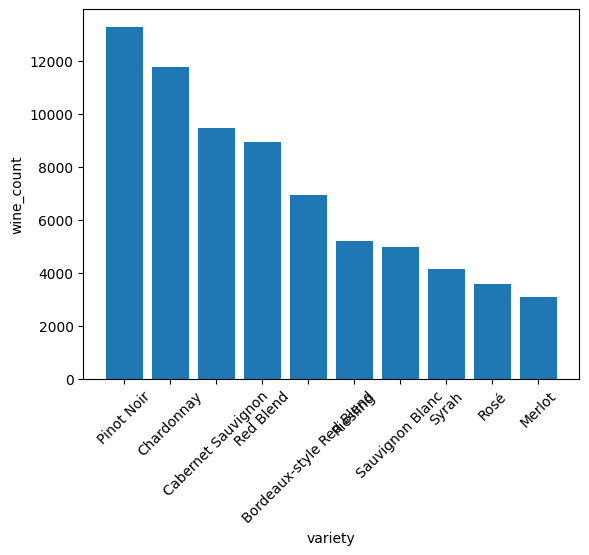

In [16]:
variety_count_result = %sql SELECT variety, count(*) as wine_count FROM winery WHERE variety is not null GROUP BY variety ORDER BY wine_count DESC LIMIT 10;
variety_count_result.bar()


#### 2.3.7. top 10 winery with most wine records¶

 * sqlite:///cs513_final_project_profiling.db
Done.


<BarContainer object of 10 artists>

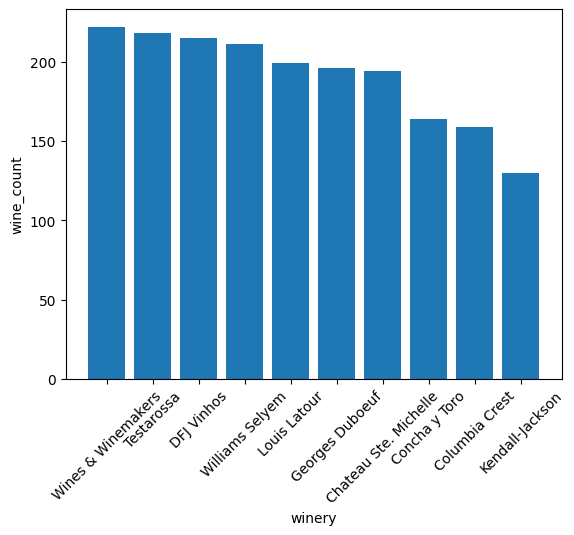

In [17]:
winery_count_result = %sql SELECT winery, count(*) as wine_count FROM winery WHERE winery is not null GROUP BY winery ORDER BY wine_count DESC LIMIT 10;
winery_count_result.bar()


## 3. Discovery of integrity constraint violations

In [18]:
def constraint_violation_helper(constraint_violation_type, constraint_violation_count):
    print(f'{constraint_violation_type}: {constraint_violation_count}, percentage: {round(constraint_violation_count/total_count * 100, 3)}%')

### 3.1 Key constraint

for given wine title and given reviewer and reviewer's twitter account, there should be no more than 1 review

In [19]:
key_constraint_violation_sql_result = %sql select count(*) as key_constrait_violations from (select title,taster_name,taster_twitter_handle, count(*) as title_count from winery group by title, taster_name, taster_twitter_handle) where title_count>1;
constraint_violation_helper('key_constraint_violation_count', key_constraint_violation_sql_result[0][0])

 * sqlite:///cs513_final_project_profiling.db
Done.
key_constraint_violation_count: 10681, percentage: 8.218%


### 3.2 Functional dependency

3.2.1 for given taster twitter_account, there should be no more than 1 taster

In [20]:
taster_func_dependency_violation_sql_result = %sql select count(*) from winery where taster_twitter_handle in (select taster_twitter_handle from (select taster_twitter_handle, count(*) as taster_name_count from (select distinct taster_name, taster_twitter_handle from winery where taster_name is not null and taster_twitter_handle is not null) group by taster_twitter_handle) where taster_name_count>1);
constraint_violation_helper('taster_func_dependency_violation_count', taster_func_dependency_violation_sql_result[0][0])

%sql select taster_twitter_handle as twitter_handle_function_dependency_violation from (select taster_twitter_handle, count(*) as taster_name_count from (select distinct taster_name, taster_twitter_handle from winery where taster_name is not null and taster_twitter_handle is not null) group by taster_twitter_handle) where taster_name_count>1;

 * sqlite:///cs513_final_project_profiling.db
Done.
taster_func_dependency_violation_count: 1005, percentage: 0.773%
 * sqlite:///cs513_final_project_profiling.db
Done.


twitter_handle_function_dependency_violation
@worldwineguys


3.2.2 for given winery, the combination of province and country should no more than 1

In [21]:
winery_func_dependency_violation_sql_result = %sql select count(*) from winery where winery in (select winery from (select winery, count(*) as geo_count from (select distinct winery, province, country from winery where winery is not null and province is not null and country is not null) group by winery) where geo_count>1);
constraint_violation_helper('winery_func_dependency_violation_count', winery_func_dependency_violation_sql_result[0][0])

%sql select winery as winery_function_dependency_violation_top_10 from (select winery, count(*) as geo_count from (select distinct winery, province, country from winery where winery is not null and province is not null and country is not null) group by winery) where geo_count>1 limit 10;

 * sqlite:///cs513_final_project_profiling.db
Done.
winery_func_dependency_violation_count: 26168, percentage: 20.134%
 * sqlite:///cs513_final_project_profiling.db
Done.


winery_function_dependency_violation_top_10
18401 Cellars
1848 Winery
3 Horse Ranch Vineyards
A-Mano
A. Parparoussis
A.A. Badenhorst Family Wines
Abarbanel
Achaia Clauss
Ackerman
Acordeón


3.2.3 for given province, the number of country should be no more than 1

In [22]:
province_func_dependency_violation_sql_result = %sql select count(*) from (select province, count(*) as country_count from (select distinct country, province from winery) group by province) where country_count > 1;
constraint_violation_helper('province_func_dependency_violation_count', province_func_dependency_violation_sql_result[0][0])

 * sqlite:///cs513_final_project_profiling.db
Done.
province_func_dependency_violation_count: 0, percentage: 0.0%


3.2.4 for given title, the variety and designation should be no more than 1

In [23]:
title_func_dependency_violation_sql_result = %sql select count(*) from winery where title in (select title from (select title, count(*) as variety_desig_count from (select distinct title, variety, designation from winery) group by title) where variety_desig_count>1);
constraint_violation_helper('title_func_dependency_violation_count', title_func_dependency_violation_sql_result[0][0])

 * sqlite:///cs513_final_project_profiling.db
Done.
title_func_dependency_violation_count: 552, percentage: 0.425%


### 3.3 Semantic constraint

3.3.1 Points value should be between 0 to 100

In [24]:
points_semantic_violation_sql_result = %sql select count(*) from winery where points <0 or points>100;
constraint_violation_helper('points_semantic_violation_count', points_semantic_violation_sql_result[0][0])

 * sqlite:///cs513_final_project_profiling.db
Done.
points_semantic_violation_count: 0, percentage: 0.0%


3.3.2 Price value should be greater than 0

In [25]:
price_semantic_violation_sql_result = %sql select count(*) from winery where price <=0;
constraint_violation_helper('price_semantic_violation_count', price_semantic_violation_sql_result[0][0])

 * sqlite:///cs513_final_project_profiling.db
Done.
price_semantic_violation_count: 0, percentage: 0.0%


### 3.4 Inclusion dependency

N/A

## 4. Clean up

In [26]:
# Close connection to SQLite database
conn.close()